# Лабораторная работа №4
## Изучение библиотек для обработки и визуализации данных

### Цели работы:
1. Познакомиться c библиотеками Python NumPy, Pandas и Matplotlib;
2. Разобраться с принципами работы в среде Jupyter Notebook на основе сервиса Google Colab;
3. Получить навыки выполнения векторных вычислений с использованием библиотеки NumPy;
4. Получить навыки анализа, обработки и визуализации датасетов с применением библиотек Pandas и Matplotlib.

### Задание
В соответствии с вариантом №12 разобрать датасет с информацией о пассажирах Титаника:
1. Определить, содержит ли какой-нибудь столбец датасета пропущенные значения;
2. Определить количество пассажиров, путешествующих вторым классом вместе с родителями или детьми;
3. Построить диаграмму распределения значений цены билета по всем пассажирам. Проинтерпретировать результат. Сказать, наблюдаются ли в данных выбросы;
4. Определить, проще ли мужчинам в катастрофе выжить. Привести доказательство ответа;
5. Удалить столбец с именем пассажиров из датафрейма;
6. Закодировать столбец "Пол пассажира" с помощью one-hot-кодирования;
7. Построить диаграмму рассеяния между признаками "Возраст" и "Цена билета". Проинтерпретировать ответ;
8. Отнормировать значения признаков "Возраст" и "Цена билета";
9. Построить гистограммы распределения пассажиров по полу и по возрасту для каждого класса. Расположить гистограммы одна под другой. Оси абсцисс должны быть однаковыми.

### Содержание <a class="anchor" id="content"></a>
1. [Импорт библиотек и загрузка данных в датафрейм pandas](#1);
2. [Обзор датасета](#2);
3. [Определение пропущенных значений](#3);
4. [Определение количества пассажиров, путешествующих вторым классом вместе с родителями или детьми](#4);
5. [Построение диаграммы распределения значений цены билета по всем пассажирам](#5);
6. [Определение факта, что мужчинам проще выжить в катастрофе](#6);
7. [Удаление столбца с именем пассажиров](#7);
8. [Кодирование столбца "Пол пассажира" с помощью one-hot-кодирования](#8);
9. [Построение диаграммы рассеяния между признаками "Возраст" и "Цена билета"](#9);
10. [Нормировка значений признаков "Возраст" и "Цена билета"](#10);
11. [Построение гистограммы распределения пассажиров по полу и по возрасту для каждого класса](#11);

#### Импорт библиотек и загрузка данных в датафрейм pandas <a class="anchor" id="1"></a>

Импортируем библиотеки, необходимые для работы.

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Загрузим данные и сформируем Pandas DataFrame:

In [251]:
df = pd.read_csv('../data/titanic.csv')

#### Обзор датасета <a class="anchor" id="2"></a>

Значения колонок датасета следующие (**в соответствии с информацией с сайта**):
*    Survived Indicator (выжил пассажир или нет)
*    Passenger Class (класс)
*    Name (имя)
*    Sex (пол)
*    Age (возраст)
*    Siblings/Spouses Aboard (есть ли братья, сестры или супруг(а) на борту)
*    Parents/Children Aboard (есть ли родители или дети на борту)
*    Fare paid in £s (цена билета в фунтах стерлингов)

In [252]:
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


Выведем общую информацию о данных:

In [253]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


Выведем типы данных колонок:

In [254]:
df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

Так как на основе данных известно, что имя и пол человека являются строковыми значениями, возраст - целым числом, а остальные числовые значения являются значениями из небольшого диапазона, то преобразуем схему следующим образом:

In [255]:
convert_dict = {
    'Survived': 'int32',
    'Pclass': 'int32',
    'Name': 'string',
    'Sex': 'string',
    'Age': 'int32',
    'Siblings/Spouses Aboard': 'int32',
    'Parents/Children Aboard': 'int32'
}

df = df.astype(convert_dict)
df.dtypes

Survived                            int32
Pclass                              int32
Name                       string[python]
Sex                        string[python]
Age                                 int32
Siblings/Spouses Aboard             int32
Parents/Children Aboard             int32
Fare                              float64
dtype: object

#### Определение пропущенных значений <a class="anchor" id="3"></a>

In [256]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

На основе полученного результата делаем вывод, что в данном датасете отсутствуют пропущенные значения.

#### Определение количества пассажиров, путешествующих вторым классом вместе с родителями или детьми <a class="anchor" id="4"></a>

In [257]:
second_pclass_with_parents_or_childrens = df[(df['Pclass'] == 2) & (df['Parents/Children Aboard'] > 0)]

print(f"""
    Number of passengers with second passenger class and with parents or childre aboard: 
    {len(second_pclass_with_parents_or_childrens)}
""")

second_pclass_with_parents_or_childrens.head(3)


    Number of passengers with second passenger class and with parents or childre aboard: 
    50



,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
42,1,2,Miss. Simonne Marie Anne Andree Laroche,female,3,1,2,41.5792
57,1,2,Miss. Constance Mirium West,female,5,1,2,27.7500
77,1,2,Master. Alden Gates Caldwell,male,0,0,2,29.0000


Таким образом, количество пассажиров, путешествующих вторым классом вместе с родителями или детьми, равняется 50.

#### Построение диаграммы распределения значений цены билета по всем пассажирам <a class="anchor" id="5"></a>

Text(0, 0.5, 'Count')

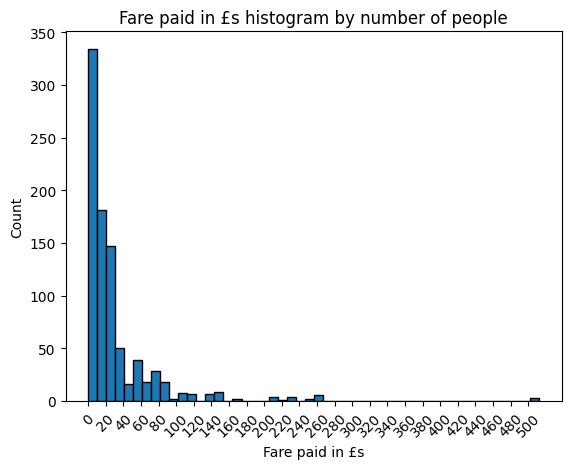

In [258]:
plt.hist(df['Fare'], bins=50, edgecolor='black')
plt.xticks(np.arange(df['Fare'].min(), df['Fare'].max(), 20.0), rotation=45)
plt.title('Fare paid in £s histogram by number of people')
plt.xlabel('Fare paid in £s')
plt.ylabel('Count')

На основе полученой гистограммы видно, что большинство людей купили билеты по цене ниже 100 фунтов стерлингов. Однако видны и выбросы, когда билеты были куплены более чем за 200 фунтов стерлингов.

#### Определение факта, что мужчинам проще выжить в катастрофе <a class="anchor" id="6"></a>

In [259]:
df_man = df[df['Sex'] == 'male']
df_woman = df[df['Sex'] == 'female']

print(f'Number of men: {len(df_man)}')
print(f'Number of women: {len(df_woman)}')

Number of men: 573
Number of women: 314


In [260]:
df_man_survived = df_man[df_man['Survived'] == 1]
df_woman_survived = df_woman[df_woman['Survived'] == 1]

print(f'Number of men survived: {len(df_man_survived)}')
print(f'Number of women survived: {len(df_woman_survived)}')

Number of men survived: 109
Number of women survived: 233


In [261]:
print(f'Man survived %: {round(len(df_man_survived) / len(df_man) * 100, 2)}')
print(f'Woman survived %: {round(len(df_woman_survived) / len(df_woman) * 100, 2)}')

Man survived %: 19.02
Woman survived %: 74.2


Предположение о том, что мужчинам проще выжить в катастрофе, чем женщинам, является неверным, поскольку процент выживших мужчин из общего количества мужчин равняется 19 процентам, в то врема как у женщин - 74.

#### Удаление столбца с именем пассажиров <a class="anchor" id="7"></a>

In [262]:
df = df.drop('Name', errors='ignore', axis=1)
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22,1,0,7.2500
1,1,1,female,38,1,0,71.2833
2,1,3,female,26,0,0,7.9250
3,1,1,female,35,1,0,53.1000
4,0,3,male,35,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27,0,0,13.0000
883,1,1,female,19,0,0,30.0000
884,0,3,female,7,1,2,23.4500
885,1,1,male,26,0,0,30.0000


За ненадобностью для дальнейшего анализа колонка с именами пассажиров удалена из датасета.

#### Кодирование столбца "Пол пассажира" с помощью one-hot-кодирования <a class="anchor" id="8"></a>

In [263]:
one_hot_sex = pd.get_dummies(df['Sex'], prefix='Sex')
one_hot_sex

,Sex_female,Sex_male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
882,False,True
883,True,False
884,True,False
885,False,True


In [264]:
df = df.drop('Sex', errors='ignore', axis=1)
df = df.join(one_hot_sex)
df

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
0,0,3,22,1,0,7.2500,False,True
1,1,1,38,1,0,71.2833,True,False
2,1,3,26,0,0,7.9250,True,False
3,1,1,35,1,0,53.1000,True,False
4,0,3,35,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...
882,0,2,27,0,0,13.0000,False,True
883,1,1,19,0,0,30.0000,True,False
884,0,3,7,1,2,23.4500,True,False
885,1,1,26,0,0,30.0000,False,True


Колонка класса пассажира была преобразована при помощи one-hot-кодирования на три отдельные колонки, где каждая из себя представляет принадлежность 1, 2 и 3 классу.

#### Построение диаграммы рассеяния между признаками "Возраст" и "Цена билета" <a class="anchor" id="9"></a>

<Axes: title={'center': 'Scatter plot of fare and passenger age'}, xlabel='Age', ylabel='Fare'>

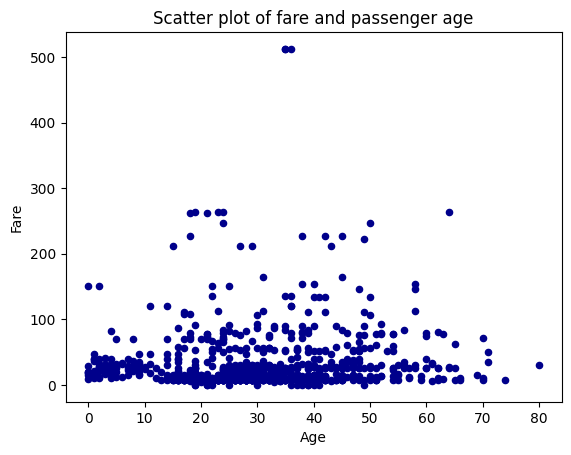

In [265]:
df.plot.scatter(x='Age', y='Fare', c='DarkBlue', title='Scatter plot of fare and passenger age')

Как видно по диаграмме рассеяния между признаками "Возраст" и "Цена билета" отсутствует какая-либо зависимость. Цена билета для всех возрастов пассажиров в большем числе случаев не превышает 100 фунтов стерлингов.

#### Нормировка значений признаков "Возраст" и "Цена билета" <a class="anchor" id="10"></a>

Используем min-max нормализацию:

In [266]:
def normalize_df_column(df, column):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [267]:
df['Age_normalized'] = normalize_df_column(df, 'Age')
df['Fare_normalized'] = normalize_df_column(df, 'Fare')
df

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male,Age_normalized,Fare_normalized
0,0,3,22,1,0,7.2500,False,True,0.2750,0.014151
1,1,1,38,1,0,71.2833,True,False,0.4750,0.139136
2,1,3,26,0,0,7.9250,True,False,0.3250,0.015469
3,1,1,35,1,0,53.1000,True,False,0.4375,0.103644
4,0,3,35,0,0,8.0500,False,True,0.4375,0.015713
...,...,...,...,...,...,...,...,...,...,...
882,0,2,27,0,0,13.0000,False,True,0.3375,0.025374
883,1,1,19,0,0,30.0000,True,False,0.2375,0.058556
884,0,3,7,1,2,23.4500,True,False,0.0875,0.045771
885,1,1,26,0,0,30.0000,False,True,0.3250,0.058556


In [268]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Age_normalized,Fare_normalized
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000,887.000000,887.000000
mean,0.385569,2.305524,29.455468,0.525366,0.383315,32.30542,0.368193,0.063056
std,0.487004,0.836662,14.129919,1.104669,0.807466,49.78204,0.176624,0.097168
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.92500,0.250000,0.015469
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420,0.350000,0.028213
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750,0.475000,0.060776
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920,1.000000,1.000000


Признаки "Возраст" и "Цена билета" были нормализованы при помощи min-max нормализации.

#### Построение гистограммы распределения пассажиров по полу и по возрасту для каждого класса <a class="anchor" id="11"></a>

Text(0.5, 0, 'Third Pclass')

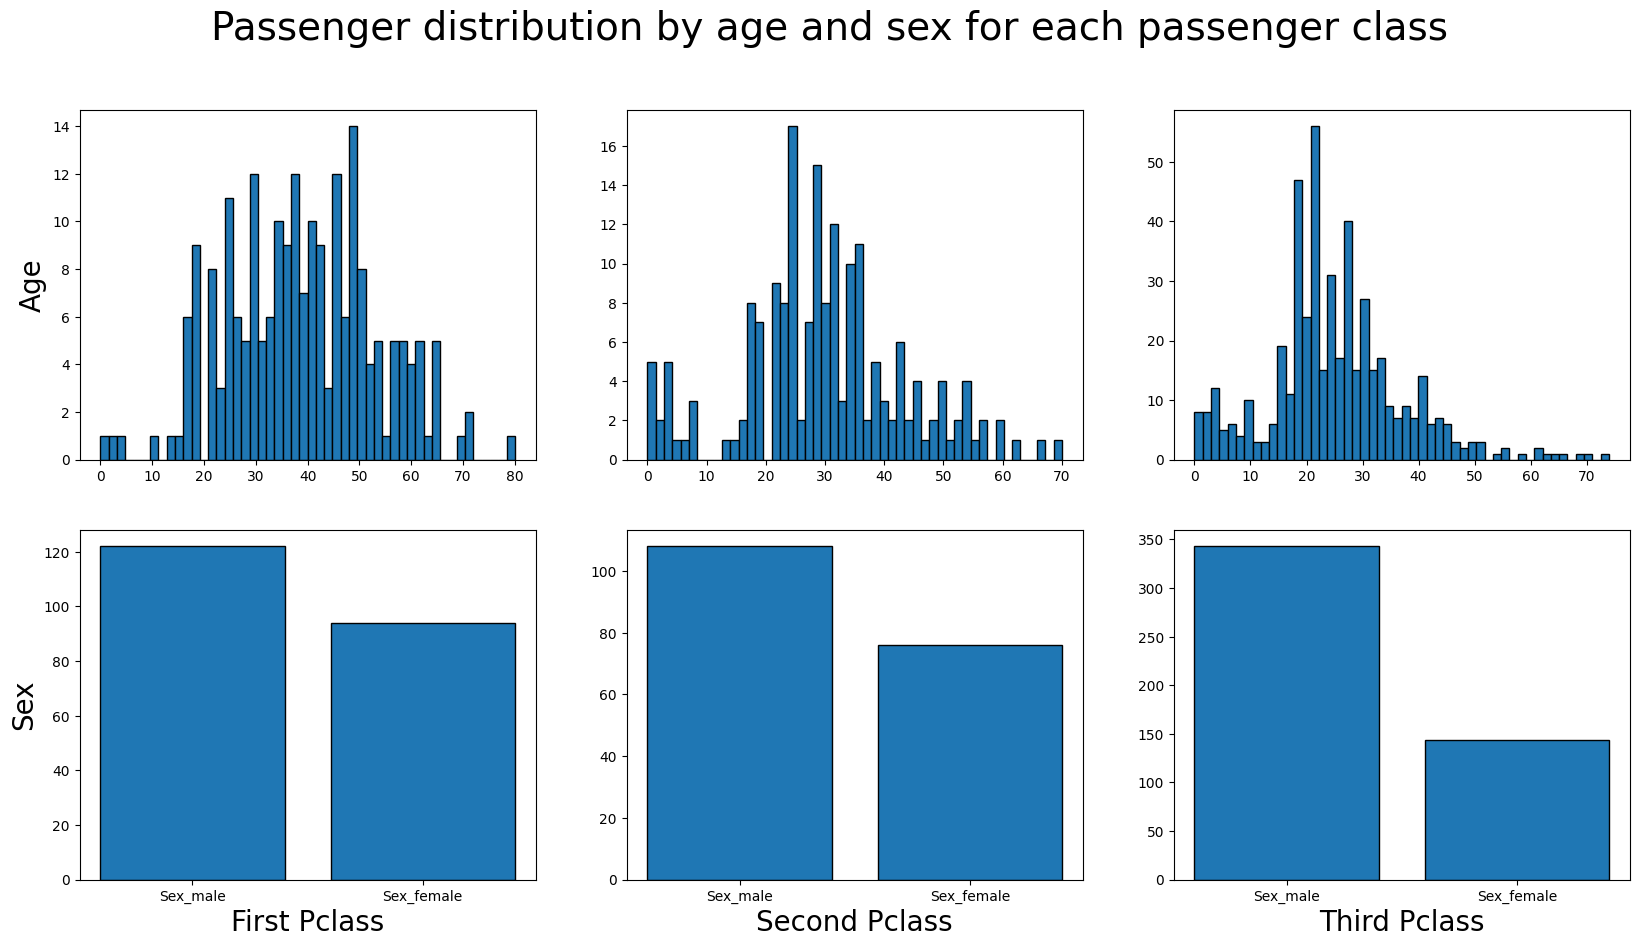

In [269]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

age_expression = lambda df, p_class: df.loc[df['Pclass'] == p_class, 'Age']
sex_expression = lambda df, p_class: df.loc[df['Pclass'] == p_class, ['Sex_male', 'Sex_female']].value_counts()
sex_xlabels = ['Sex_male', 'Sex_female']

axs[0, 0].hist(age_expression(df, 1), bins=50, edgecolor='black')
axs[0, 1].hist(age_expression(df, 2), bins=50, edgecolor='black')
axs[0, 2].hist(age_expression(df, 3), bins=50, edgecolor='black')

axs[1, 0].bar(sex_xlabels, sex_expression(df, 1), edgecolor='black')
axs[1, 1].bar(sex_xlabels, sex_expression(df, 2), edgecolor='black')
axs[1, 2].bar(sex_xlabels, sex_expression(df, 3), edgecolor='black')

plt.suptitle('Passenger distribution by age and sex for each passenger class', fontsize=28)

axs[0, 0].set_ylabel('Age', fontsize=20)
axs[1, 0].set_ylabel('Sex', fontsize=20)

axs[1, 0].set_xlabel('First Pclass', fontsize=20)
axs[1, 1].set_xlabel('Second Pclass', fontsize=20)
axs[1, 2].set_xlabel('Third Pclass', fontsize=20)

### Выводы
В ходе данного задания в лабораторной работе были изучены библиотеки Pandas и Matplotlib, разобран датасет с информацией о пассажирах Титаника, получены навыки анализа, обработки и визуализации датасетов с применением вышеназванных библиотек.